## Lab2 - TSP Fast solution

https://www.wolframcloud.com/obj/giovanni.squillero/Published/Lab2-tsp.nb

In [1]:
from itertools import combinations
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt
import random

In [2]:
CITIES = pd.read_csv('cities/italy.csv', header=None, names=['name', 'lat', 'lon'])

In [3]:
# Save for each couple save -> ( distance, index of compared city )
DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)), dtype=tuple)
for c1, c2 in combinations(CITIES.itertuples(), 2):
    DIST_MATRIX[c1.Index, c2.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c2.Index)
    DIST_MATRIX[c2.Index, c1.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c1.Index)

## Helper Functions

In [4]:
def cost(path):
    circular_path = path + [path[0]]
    tot_dist = 0
    for i in range(len(circular_path)-1):
        tot_dist += DIST_MATRIX[circular_path[i],circular_path[i+1]][0]
    return tot_dist


In [5]:
def print_path(path):
    circular_path = path + [path[0]]
    print("Path:")
    for i in range(len(circular_path)-1):
        print(f"{CITIES.at[circular_path[i],'name']} -> {CITIES.at[circular_path[i+1],'name']} ({DIST_MATRIX[circular_path[i],circular_path[i+1]][0]:.2f}km)")

    print(f"\nNumber of steps: {len(circular_path)-1} , Total lenght: {cost(path):.2f} km")


In [6]:
def visualize_path(path):
    circular_path = path + [path[0]]
    x_coordinates = [CITIES.at[i,'lon'] for i in circular_path]
    y_coordinates = [CITIES.at[i,'lat'] for i in circular_path]

    plt.figure()
    plt.title("Path Quick Resolution")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    plt.plot(x_coordinates,y_coordinates,marker='o', linestyle='-', color='b')
    plt.show()

# Fast Resolution

Computing the closest city starting from the first

In [7]:
def compute_fast_min(start):
    # Search min algorithm
    visited = np.full(len(CITIES), False)
    curr_city_i = start
    visited[curr_city_i] = True
    path = list()
    path.append(curr_city_i)

    while not np.all(visited):

        # Find the city with minimum distance and take the correspondig index to make it the next city
        next_city_tup= np.min(DIST_MATRIX[curr_city_i,np.logical_not(visited)])
        curr_city_i = next_city_tup[1]

        path.append(curr_city_i)
        visited[curr_city_i] = True
    
    return path


Path:
Rimini -> Forlì (46.72km)
Forlì -> Ravenna (26.46km)
Ravenna -> Ferrara (66.67km)
Ferrara -> Bologna (43.43km)
Bologna -> Modena (37.29km)
Modena -> Reggio nell'Emilia (23.94km)
Reggio nell'Emilia -> Parma (26.94km)
Parma -> Piacenza (57.65km)
Piacenza -> Milan (60.65km)
Milan -> Monza (14.51km)
Monza -> Bergamo (33.92km)
Bergamo -> Brescia (46.02km)
Brescia -> Verona (61.42km)
Verona -> Vicenza (44.70km)
Vicenza -> Padua (30.13km)
Padua -> Venice (36.07km)
Venice -> Trieste (115.09km)
Trieste -> Bolzano (209.68km)
Bolzano -> Trento (49.94km)
Trento -> Novara (206.69km)
Novara -> Turin (84.46km)
Turin -> Genoa (123.19km)
Genoa -> Leghorn (146.37km)
Leghorn -> Prato (74.02km)
Prato -> Florence (17.17km)
Florence -> Perugia (119.19km)
Perugia -> Terni (63.64km)
Terni -> Rome (76.54km)
Rome -> Latina (56.84km)
Latina -> Giugliano in Campania (124.45km)
Giugliano in Campania -> Naples (11.15km)
Naples -> Salerno (46.25km)
Salerno -> Foggia (109.52km)
Foggia -> Andria (67.42km)
Andria

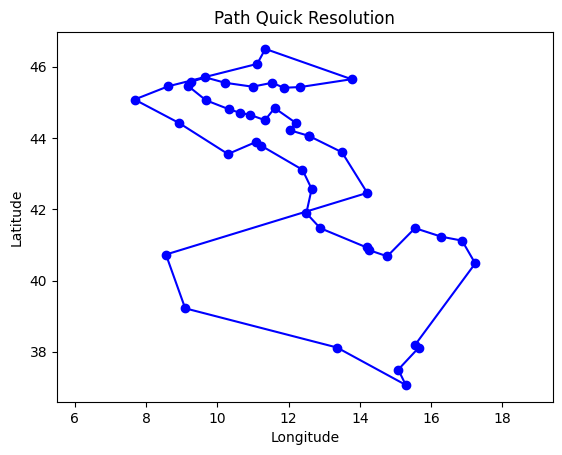

In [8]:
solution = compute_fast_min(0)

for i in range(1,len(CITIES)):
    new_path = compute_fast_min(i)
    if cost(new_path) < cost(solution):
        solution = new_path

print_path(solution)

visualize_path(solution)
